#Quantum Hangman



In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00


In [2]:
WORDS = ["qubit", "qubits", "superposition", "entanglement", "decoherence", "measurement",
    "interference", "phase", "amplitude", "statevector", "densitymatrix", "mixedstate",
    "purestate", "Hilbertspace", "ket", "bra", "braket", "observable", "operator",
    "unitary", "hermitian", "eigenstate", "eigenvalue", "basis", "computationalbasis",
    "Blochsphere", "Blochvector", "tensorproduct", "innerproduct", "outerproduct",
    "normalization", "probabilityamplitude", "probabilitydistribution", "postselection",
    "projectivemeasurement", "POVM", "ancilla", "ancillaryqubit", "classicalregister", "gate", "gates", "Hadamard", "Hgate", "PauliX", "PauliY", "PauliZ",
    "Xgate", "Ygate", "Zgate", "Sgate", "Tgate", "CNOT", "CX", "CZ",
    "Toffoli", "Fredkin", "Swap", "ControlledU", "multicontrol", "phasegate",
    "rotation", "Rx", "Ry", "Rz", "U3", "U2", "U1", "identitygate", "resetgate",
    "measure", "readout", "entanglinggate", "twoqubitgate", "threequbitgate",
    "parametricgate", "parametrizedcircuit", "Grover", "Groversearch", "Shor", "Shorfactorization", "QFT", "quantumfouriertransform",
    "phaseestimation", "quantumphaseestimation", "VQE", "variationalquantumeigensolver",
    "QAOA", "quantumapproxoptimization", "HHL", "harrowhassidimlloyd", "quantumwalk",
    "quantumsimulation", "adiabatic", "adiabaticquantumcomputation", "quantumchemistry",
    "quantummachinelearning", "qml", "quantumannealing", "amplitudeamplification",
    "errormitigation", "quantumkeydistribution", "QKD", "teleportation", "densecoding", "quantumerrorcorrection", "QEC", "surfacecode", "toriccode", "stabilizer",
    "stabilizercode", "syndrome", "syndromemeasurement", "logicalqubit", "physicalqubit",
    "faulttolerance", "threshold", "concatenatedcode", "CSScode", "Steanecode",
    "Shorcode", "distance", "errorrate", "bitflip", "phaseflip", "depolarizing",
    "amplitudedamping", "phasedamping", "leakage", "errormodel"]




In [3]:
!pip install pqcrypto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 31.4 MB/s eta 0:00:00


In [4]:
!pip install --upgrade pqcrypto

In [5]:
!pip install pqcrypto cryptography



#  <ins>Method-II : Using Kyber & AEAD(ChaCha20-Poly1305) </ins>
- For this part I have used ML_KEM, which is a Kyber Key Encapsulation mechanism (ML stands for Module Lattice).
- The find_ml_kem_module() function would first search for available ML_KEM package, then would use Kyber module (named mod here) to generate public key, secret key. Kyber encryption with public key would give Kyber_Ciphettext(ct_kem) and a shared secret(ss_enc). We get another shared_secret from Kyber wrapper function using ct_kem and secret key. Provided both match we can go ahead for the next process, otherwise we would have AEAD failure.
- The derive_aead_key_hkdf() function is implemented using hash based function SHA-256. Apart from SHA-256, HKDF Constructor takes more three inputs, info: It's a combination of a python literal, big-endian byte form of position index of guessed letter and the byte-from of guessed letter. E.g. if Bob is guessing letter "i" from word "spin" , $info=b"letter" + b"||" + b"\x00\x00\x00\x02" + b"||" + b"\x69"$. length: it would be 32 byte , which is the size of the output , salt: random string that add up before the data, which we have ommitted here. It will give 32 byte key that is compatible for AEAD ChaCha20-Poly1305 algorithm.
- The aead_encrypt_byte() function takes use of aead_key generated from above function and form an aead constructor. Besides it uses a 12 byte random number nonce and encrypts the letter and returns nonce and aead_Ciphertext. The associated data is a metadata to enhance the level of encryption, which I have ommitted here.
- The aead_decrypt_byte() function uses the aead constructor incorporating the outputs of above function and returns the recovered letter, which would be the decrypted letter and should match with the guess.
- The encapsulate_letter() and decapsulate_and_decrypt_letter() function uses above functions and perform the letter encryption into Ciphertext and then decrypting them with right keys and guess letters (one at a time though).
- The game would be realized as follows: Alice (the host) would be having the access to all of the letters of the word as quantum states , therefore would be encrypting them using encapsulate_letter() function and Bob (the player) would be guessing one letter at a time that he would be passing on to Alice and then that would be used in decapsulate_and_decrypt_letter() function to derive recovered letter. The recovered letter would be matched to guessed letter in run_hangman() function, which will match provided the letter exists in the word, as there will already be an encryption for that letter, the letter would be revealed and we can go for next stage of the game. Taking a wrong guess of letter would lead to a wrong aead_key, which would give AEAD failure.
  

In [6]:
# Colab cell (bash)
!apt-get update -qq
!apt-get install -y graphviz
!pip install --quiet graphviz

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


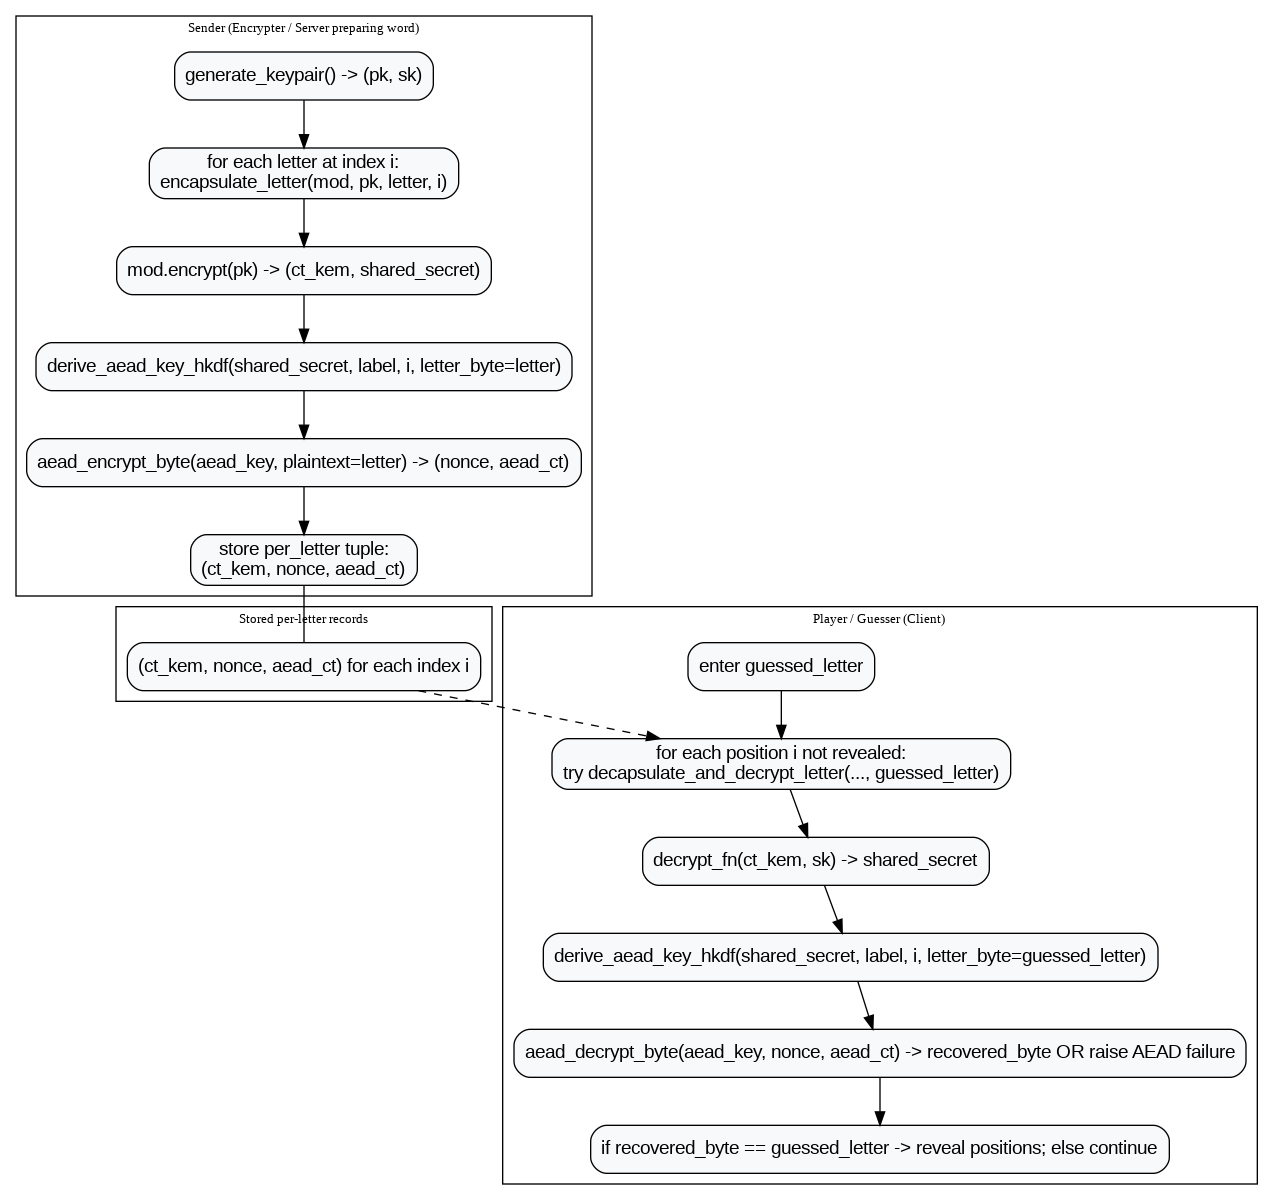

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Colab cell (python)
from graphviz import Digraph
from IPython.display import Image, display

def build_flowchart_inline():
    g = Digraph('HKDF_KEM_AEAD_Hangman', format='png')
    g.attr(rankdir='TB', fontsize='10')
    box = {'shape': 'box', 'style': 'rounded,filled', 'fillcolor': '#f8f9fa', 'fontname': 'Helvetica'}

    with g.subgraph(name='cluster_sender') as s:
        s.attr(label='Sender (Encrypter / Server preparing word)', color='black')
        s.node('S1', 'generate_keypair() -> (pk, sk)', **box)
        s.node('S2', 'for each letter at index i:\\nencapsulate_letter(mod, pk, letter, i)', **box)
        s.node('S2a', 'mod.encrypt(pk) -> (ct_kem, shared_secret)', **box)
        s.node('S2b', 'derive_aead_key_hkdf(shared_secret, label, i, letter_byte=letter)', **box)
        s.node('S2c', 'aead_encrypt_byte(aead_key, plaintext=letter) -> (nonce, aead_ct)', **box)
        s.node('S3', 'store per_letter tuple:\\n(ct_kem, nonce, aead_ct)', **box)
        s.edges([('S1', 'S2'), ('S2', 'S2a'), ('S2a', 'S2b'), ('S2b', 'S2c'), ('S2c', 'S3')])

    with g.subgraph(name='cluster_storage') as st:
        st.attr(label='Stored per-letter records', color='black')
        st.node('P', '(ct_kem, nonce, aead_ct) for each index i', **box)

    with g.subgraph(name='cluster_player') as p:
        p.attr(label='Player / Guesser (Client)', color='black')
        p.node('G1', 'enter guessed_letter', **box)
        p.node('G2', 'for each position i not revealed:\\ntry decapsulate_and_decrypt_letter(..., guessed_letter)', **box)
        p.node('G2a', 'decrypt_fn(ct_kem, sk) -> shared_secret', **box)
        p.node('G2b', 'derive_aead_key_hkdf(shared_secret, label, i, letter_byte=guessed_letter)', **box)
        p.node('G2c', 'aead_decrypt_byte(aead_key, nonce, aead_ct) -> recovered_byte OR raise AEAD failure', **box)
        p.node('G3', 'if recovered_byte == guessed_letter -> reveal positions; else continue', **box)
        p.edges([('G1','G2'), ('G2','G2a'), ('G2a','G2b'), ('G2b','G2c'), ('G2c','G3')])

    g.edge('S3', 'P', label='', arrowhead='none')
    g.edge('P', 'G2', label='', style='dashed')
    return g

g = build_flowchart_inline()
out = g.render(filename='hkdf_flowchart_colab', cleanup=True)  # produces hkdf_flowchart_colab.png
display(Image('hkdf_flowchart_colab.png'))
from google.colab import files
files.download('hkdf_flowchart_colab.png')

In [8]:
#!/usr/bin/env python3
"""
Hangman using a pqcrypto ml_kem_* KEM as Kyber-like backend and HKDF+ChaCha20-Poly1305
for per-letter AEAD.

This edition enforces standard Hangman rules and always selects the secret word
randomly from WORD_LIST (player is not offered to choose a word).

Rules enforced:
 - Player may guess letters (a-z).
 - Correct guess: reveal ALL occurrences of that letter in the word; no penalty.
 - Incorrect guess: decrement remaining wrong guesses by 1.
 - Repeated guess: no penalty, not counted as wrong.
 - Game ends when the word is fully revealed (win) or remaining wrong guesses reaches 0 (lose).
 - The secret word is never shown while playing; it is revealed only at the end.

The cryptographic approach is unchanged from previous versions.
"""
from typing import Callable, Optional, Tuple, List
import importlib
import pkgutil
import random
import os

# cryptography primitives
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.ciphers.aead import ChaCha20Poly1305

# -------------------------
# helper: find pqcrypto ml_kem module and unified decrypt wrapper
# -------------------------
def find_ml_kem_module() -> Tuple[Optional[object], Optional[Callable[[bytes, bytes], bytes]]]:
    """
    Locate a pqcrypto.ml_kem_* module and return (module, decrypt_fn).
    decrypt_fn takes (ciphertext_bytes, secret_key_bytes) and returns shared_secret_bytes.
    """
    try:
        import pqcrypto.kem as kempkg  # type: ignore
    except Exception:
        return None, None

    names = []
    if hasattr(kempkg, "__path__"):
        for _f, name, _p in pkgutil.iter_modules(kempkg.__path__):
            names.append(name)
    else:
        names = [n for n in dir(kempkg) if "ml_kem" in n.lower()]

    preferred = [n for n in ("ml_kem_512", "ml_kem_768", "ml_kem_1024") if n in names]
    for n in names:
        if n.startswith("ml_kem") and n not in preferred:
            preferred.append(n)

    for modname in preferred:
        full = f"pqcrypto.kem.{modname}"
        try:
            mod = importlib.import_module(full)
        except Exception:
            continue
        # require functions
        if not all(hasattr(mod, fn) for fn in ("generate_keypair", "encrypt", "decrypt")):
            continue
        # test which decrypt order is expected
        try:
            pk, sk = mod.generate_keypair()
            ct, ss_enc = mod.encrypt(pk)
        except Exception:
            continue
        try:
            ss_try = mod.decrypt(ct, sk)
            if ss_try == ss_enc:
                return mod, (lambda ciphertext, secret_key, m=mod: m.decrypt(ciphertext, secret_key))
        except Exception:
            pass
        try:
            ss_try = mod.decrypt(sk, ct)
            if ss_try == ss_enc:
                return mod, (lambda ciphertext, secret_key, m=mod: m.decrypt(secret_key, ciphertext))
        except Exception:
            pass
    return None, None

# -------------------------
# KDF and AEAD helpers (include letter byte)
# -------------------------
def derive_aead_key_hkdf(shared_secret: bytes, label: bytes, index: int,
                         letter_byte: Optional[bytes] = None, length: int = 32) -> bytes:
    """
    HKDF-SHA256 with info = label || index || (|| letter_byte)
    When encrypting include the actual letter byte; when attempting decrypt use guessed letter byte.
    """
    info = label + b"||" + index.to_bytes(4, "big")
    if letter_byte is not None:
        info = info + b"||" + letter_byte
    hkdf = HKDF(algorithm=hashes.SHA256(), length=length, salt=None, info=info)
    return hkdf.derive(shared_secret)

def aead_encrypt_byte(aead_key: bytes, plaintext_byte: int) -> Tuple[bytes, bytes]:
    aead = ChaCha20Poly1305(aead_key)
    nonce = os.urandom(12)
    pt = bytes([plaintext_byte])
    ct = aead.encrypt(nonce, pt, associated_data=None)
    return nonce, ct

def aead_decrypt_byte(aead_key: bytes, nonce: bytes, ct: bytes) -> int:
    aead = ChaCha20Poly1305(aead_key)
    pt = aead.decrypt(nonce, ct, associated_data=None)
    return pt[0]

# -------------------------
# Per-letter encapsulation / storage helpers (bind letter at encryption time)
# -------------------------
def encapsulate_letter(mod, public_key: bytes, letter: str, index: int, label: bytes = b"letter"):
    ct_kem, shared_secret = mod.encrypt(public_key)
    aead_key = derive_aead_key_hkdf(shared_secret, label, index, letter_byte=bytes([ord(letter)]))
    nonce, ct = aead_encrypt_byte(aead_key, ord(letter))
    return ct_kem, nonce, ct

def decapsulate_and_decrypt_letter(mod, decrypt_fn: Callable[[bytes, bytes], bytes], secret_key: bytes,
                                   ct_kem: bytes, nonce: bytes, aead_ct: bytes,
                                   index: int, guessed_letter: str, label: bytes = b"letter"):
    """
    Attempt to decapsulate and decrypt a single letter using guessed_letter byte.
    Raises on AEAD failure or other errors.
    """
    shared_secret = decrypt_fn(ct_kem, secret_key)
    aead_key = derive_aead_key_hkdf(shared_secret, label, index, letter_byte=bytes([ord(guessed_letter)]))
    ch = aead_decrypt_byte(aead_key, nonce, aead_ct)
    return chr(ch)

# -------------------------
# Word list and game parameters
# -------------------------
#WORD_LIST = [
   # "quantum", "hangman", "kyber", "cryptography", "notebook", "colab",
   # "superposition", "entanglement", "measurement", "protocol", "postquantum"]
WORD_LIST=WORDS
WRONG_GUESS_LIMIT = 6  # fixed wrong-guess limit per game

# -------------------------
# Hangman game logic (standard rules) — word chosen randomly
# -------------------------
def run_hangman(word: Optional[str] = None):
    mod, decrypt_fn = find_ml_kem_module()
    if mod is None:
        raise SystemExit("No pqcrypto ml_kem module found. Install pqcrypto or run toy demo.")

    # Word selection: always choose randomly if no explicit override provided by caller.
    # When invoked interactively we do not prompt the player to choose from the list.
    if not word:
        word = random.choice(WORD_LIST)
    word = word.lower()
    n = len(word)

    # Prepare KEM storage: per-letter ct_kem + AEAD
    pk, sk = mod.generate_keypair()
    per_letter_store: List[Tuple[bytes, bytes, bytes]] = []
    revealed_mask = [False] * n
    for i, ch in enumerate(word):
        ct_kem, nonce, aead_ct = encapsulate_letter(mod, pk, ch, index=i)
        per_letter_store.append((ct_kem, nonce, aead_ct))

    remaining_wrong = WRONG_GUESS_LIMIT
    guessed: List[str] = []

    def current_masked():
        # Return masked word of same length; unrevealed shown as '-'
        return "".join(word[i] if revealed_mask[i] else "-" for i in range(n))

    print(f"\nStarting Hangman (word length {n}). You have {WRONG_GUESS_LIMIT} wrong guesses allowed.\n")

    # Game loop (standard hangman)
    while remaining_wrong > 0 and not all(revealed_mask):
        # Show state
        print("=== Current State ===")
        print("Masked word       :", current_masked())
        print("Word length       :", n)
        print("Guessed letters   :", ", ".join(guessed) if guessed else "(none)")
        print("Remaining wrong   :", remaining_wrong)
        print("=====================\n")

        guess = input("Guess a letter: ").strip().lower()
        if len(guess) != 1 or not guess.isalpha():
            print("Invalid guess; please enter a single letter a-z.\n")
            continue

        if guess in guessed:
            print("You already guessed that letter; no penalty.\n")
            continue

        guessed.append(guess)

        # Attempt to reveal positions that match guess.
        revealed_any = False
        for i, (ct_kem, nonce, aead_ct) in enumerate(per_letter_store):
            if revealed_mask[i]:
                continue
            try:
                recovered = decapsulate_and_decrypt_letter(mod, decrypt_fn, sk, ct_kem, nonce, aead_ct, index=i, guessed_letter=guess)
            except Exception:
                # decryption failed for this pos -> not a match
                continue
            # If decryption succeeded and equals guess, reveal occurrences
            if recovered == guess:
                revealed_any = True
                # reveal all occurrences of this guessed letter by checking every position
                for j, (ct2, nonce2, aead_ct2) in enumerate(per_letter_store):
                    if revealed_mask[j]:
                        continue
                    try:
                        r2 = decapsulate_and_decrypt_letter(mod, decrypt_fn, sk, ct2, nonce2, aead_ct2, index=j, guessed_letter=guess)
                    except Exception:
                        continue
                    if r2 == guess:
                        revealed_mask[j] = True
                break  # already revealed occurrences; no need to continue scanning positions

        if revealed_any:
            print(f"Correct — revealed letter '{guess}'.\n")
        else:
            remaining_wrong -= 1
            print(f"Wrong guess — '{guess}' is not in the word. Remaining wrong guesses: {remaining_wrong}\n")

    # End of game summary
    print("=== Final State ===")
    print("Masked word       :", "".join(word[i] if revealed_mask[i] else "-" for i in range(n)))
    print("Guessed letters   :", ", ".join(guessed) if guessed else "(none)")
    print("Remaining wrong   :", remaining_wrong)
    print("=====================\n")

    if all(revealed_mask):
        print("You won! Word:", word)
    else:
        print("Out of wrong guesses. Word was:", word)

# -------------------------
# Run if invoked directly
# -------------------------
if __name__ == "__main__":
    run_hangman(None)



Starting Hangman (word length 8). You have 6 wrong guesses allowed.

=== Current State ===
Masked word       : --------
Word length       : 8
Guessed letters   : (none)
Remaining wrong   : 6

Guess a letter: e
Correct — revealed letter 'e'.

=== Current State ===
Masked word       : -------e
Word length       : 8
Guessed letters   : e
Remaining wrong   : 6

Guess a letter: g
Wrong guess — 'g' is not in the word. Remaining wrong guesses: 5

=== Current State ===
Masked word       : -------e
Word length       : 8
Guessed letters   : e, g
Remaining wrong   : 5

Guess a letter: h
Wrong guess — 'h' is not in the word. Remaining wrong guesses: 4

=== Current State ===
Masked word       : -------e
Word length       : 8
Guessed letters   : e, g, h
Remaining wrong   : 4

Guess a letter: s
Correct — revealed letter 's'.

=== Current State ===
Masked word       : --s----e
Word length       : 8
Guessed letters   : e, g, h, s
Remaining wrong   : 4

Guess a letter: t
Correct — revealed letter 't'.


In [ ]:
WORDS = ["qubit", "qubits", "superposition", "entanglement", "decoherence", "measurement",
    "interference", "phase", "amplitude", "statevector", "densitymatrix", "mixedstate",
    "purestate", "Hilbertspace", "ket", "bra", "braket", "observable", "operator",
    "unitary", "hermitian", "eigenstate", "eigenvalue", "basis", "computationalbasis",
    "Blochsphere", "Blochvector", "tensorproduct", "innerproduct", "outerproduct",
    "normalization", "probabilityamplitude", "probabilitydistribution", "postselection",
    "projectivemeasurement", "POVM", "ancilla", "ancillaryqubit", "classicalregister", "gate", "gates", "Hadamard", "Hgate", "PauliX", "PauliY", "PauliZ",
    "Xgate", "Ygate", "Zgate", "Sgate", "Tgate", "CNOT", "CX", "CZ",
    "Toffoli", "Fredkin", "Swap", "ControlledU", "multicontrol", "phasegate",
    "rotation", "Rx", "Ry", "Rz", "U3", "U2", "U1", "identitygate", "resetgate",
    "measure", "readout", "entanglinggate", "twoqubitgate", "threequbitgate",
    "parametricgate", "parametrizedcircuit", "Grover", "Groversearch", "Shor", "Shorfactorization", "QFT", "quantumfouriertransform",
    "phaseestimation", "quantumphaseestimation", "VQE", "variationalquantumeigensolver",
    "QAOA", "quantumapproxoptimization", "HHL", "harrowhassidimlloyd", "quantumwalk",
    "quantumsimulation", "adiabatic", "adiabaticquantumcomputation", "quantumchemistry",
    "quantummachinelearning", "qml", "quantumannealing", "amplitudeamplification",
    "errormitigation", "quantumkeydistribution", "QKD", "teleportation", "densecoding", "quantumerrorcorrection", "QEC", "surfacecode", "toriccode", "stabilizer",
    "stabilizercode", "syndrome", "syndromemeasurement", "logicalqubit", "physicalqubit",
    "faulttolerance", "threshold", "concatenatedcode", "CSScode", "Steanecode",
    "Shorcode", "distance", "errorrate", "bitflip", "phaseflip", "depolarizing",
    "amplitudedamping", "phasedamping", "leakage", "errormodel"]


